**The project aims to predict whether a passenger referred by an existing customer will book a flight or not, based on various features such as seat comfort, cabin service, travel class,food beverage , entertainment service, etc. The prediction model is developed using classification techniques in machine learning.The use of machine learning techniques allows for the development of a model that can learn from historical passenger and booking data and make accurate predictions on new data. The model can be used by airlines to target marketing campaigns towards potential passengers who are likely to book a flight based on a referral from an existing customer.**

In [13]:
#installing libraries
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [14]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')


### Loading the Dataset

In [2]:
#load dataset
airline_df=pd.read_excel('data_airline_reviews.xlsx')

## Dataset First Insights

In [3]:
#dataset first look
airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#dataset rows and column count
print(airline_df.shape)

(131895, 17)


Total 131895 rows and 17 columns are present in our dataset

In [5]:
#dataset information
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

### Checking Duplicates in Data

In [6]:
#checking for dupliacte value counts
airline_df.duplicated().value_counts()

True     70711
False    61184
Name: count, dtype: int64

In [7]:
#getting duplicate values
print(f'duplicate data count = {airline_df[airline_df.duplicated()].shape[0]}')
airline_df[airline_df.duplicated()]

duplicate data count = 70711


,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#droping the duplicate values
airline_df.drop_duplicates(inplace=True)

In [9]:
#count duplicate values
airline_df.duplicated().sum()

np.int64(0)

### Handling Null Values

In [11]:
#count missing values/null values
print(airline_df.isnull().sum())

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64


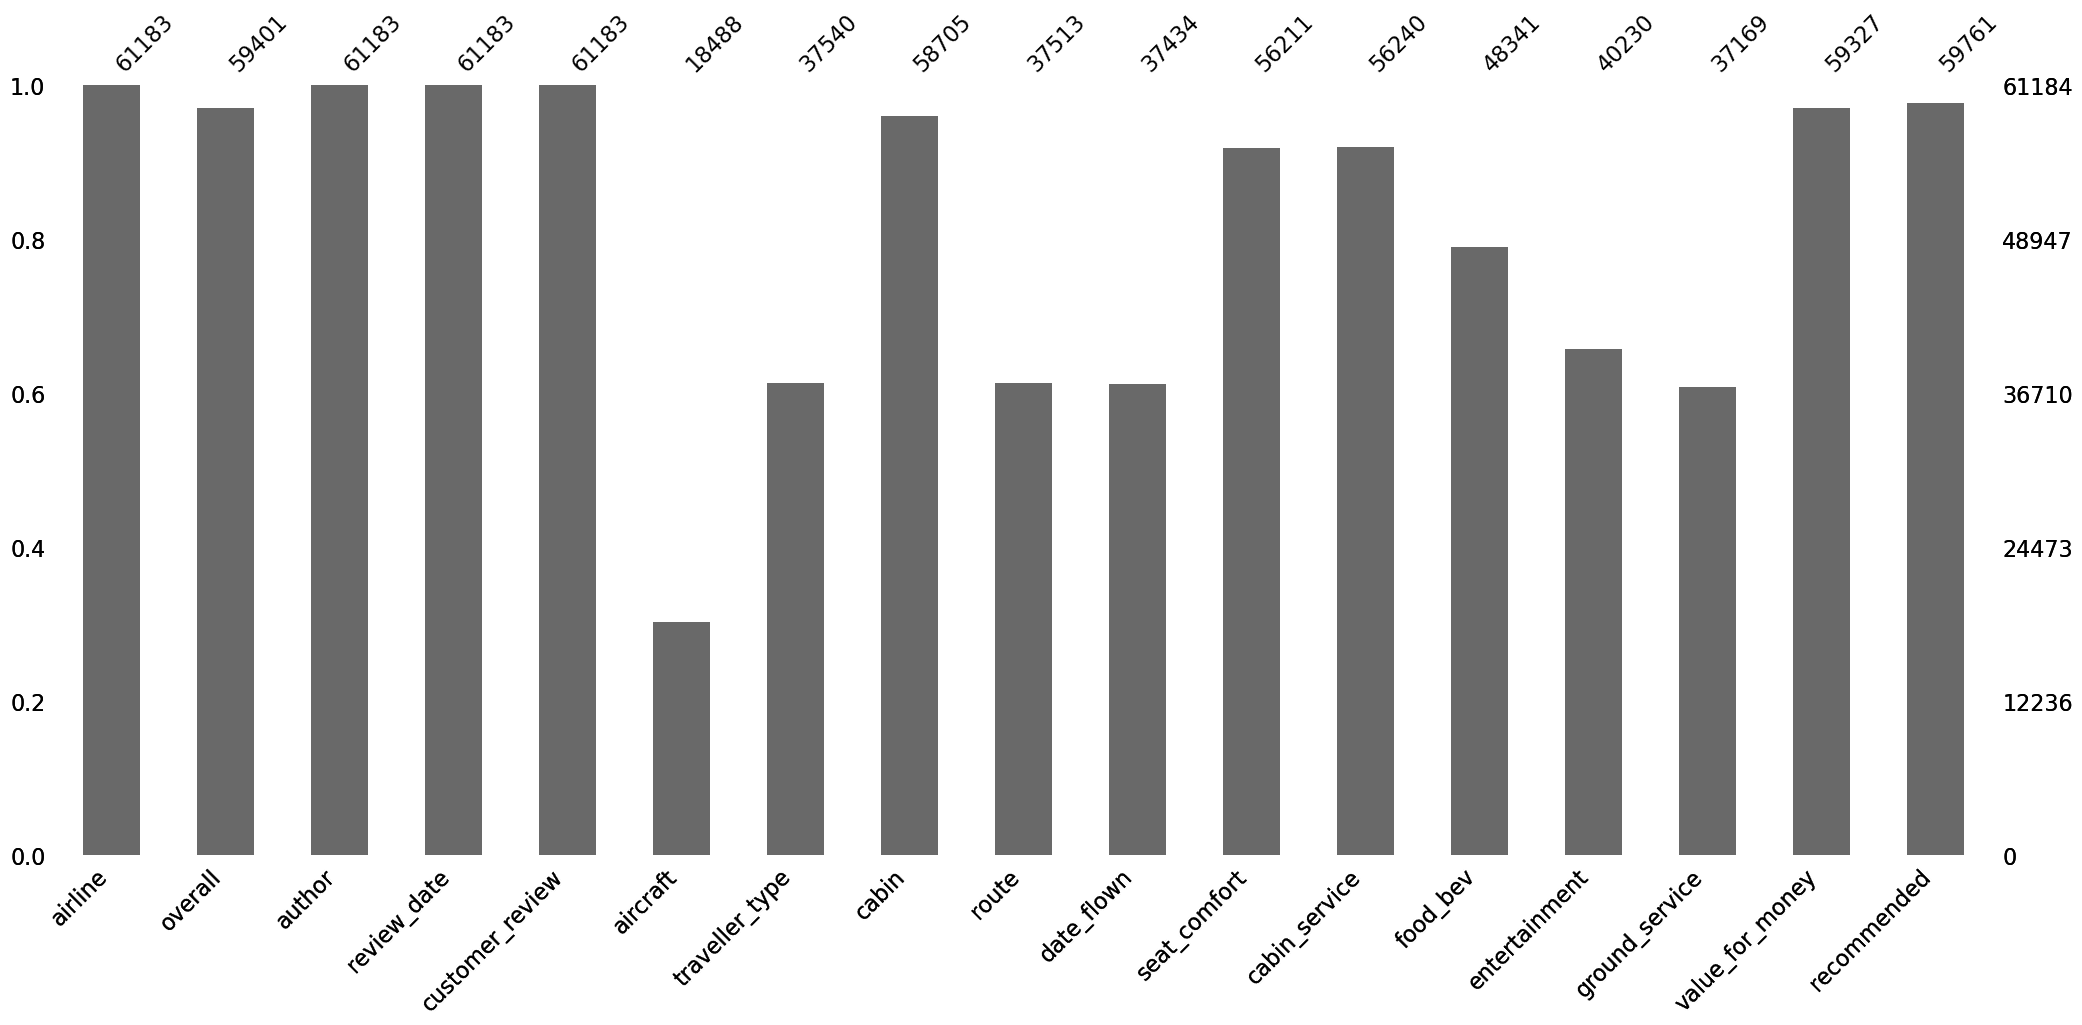

In [16]:
#visualization of missing values
msno.bar(airline_df)
plt.show()

### What do you know about your dataset

*   There are 131895  total observation with 17 different features.
*   All the Feature like aircraft,author and airline has null values.
*   There are duplicate values i.e., 70711 duplicate data.
*   As from graph there are too many null values present in dataset

## Understanding your variables

In [17]:
#dataset columns
print(f'features: {airline_df.columns.to_list}')

features: <bound method IndexOpsMixin.tolist of Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')>


In [20]:
#dataset describe
airline_df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,59401.0,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
seat_comfort,56211.0,2.959278,1.436467,1.0,2.0,3.0,4.0,5.0
cabin_service,56240.0,3.200231,1.568429,1.0,2.0,3.0,5.0,5.0
food_bev,48341.0,2.926956,1.483122,1.0,1.0,3.0,4.0,5.0
entertainment,40230.0,2.887994,1.504452,1.0,1.0,3.0,4.0,5.0
ground_service,37169.0,2.681347,1.613995,1.0,1.0,3.0,4.0,5.0
value_for_money,59327.0,2.950849,1.588433,1.0,1.0,3.0,4.0,5.0


### Variable Description

•	airline:Name of the airline

•	overall : Overall point is given to the trip between 1 to 10.

•	author : Author of the trip

•	review_date : Date of the Review

•	customer_review : Review of the customers in free text format

•	aircraft : Type of the aircraft

•	traveller_type : Type of traveller(e.g. business,lesisure) 

•	cabin : Cabin at the flight date flowan: Flight date
 
•	seat_comfort : Rated between 1-5

•	cabin_service : Rated between 1-5

•	food_bev : Rated between 1-5

•	entertainment : Rated between 1-5

•	ground_service : Rated between 1-5

•	value_for_money : Rated between 1-5

•	recommended : Binary, target variable

In [22]:
#check unique value for each variable
for i in airline_df.columns.to_list():
    print(f'No. of unique values in {i} is {airline_df[i].nunique()}')

No. of unique values in airline is 81
No. of unique values in overall is 10
No. of unique values in author is 44069
No. of unique values in review_date is 3015
No. of unique values in customer_review is 61172
No. of unique values in aircraft is 2088
No. of unique values in traveller_type is 4
No. of unique values in cabin is 4
No. of unique values in route is 24549
No. of unique values in date_flown is 63
No. of unique values in seat_comfort is 5
No. of unique values in cabin_service is 5
No. of unique values in food_bev is 5
No. of unique values in entertainment is 5
No. of unique values in ground_service is 5
No. of unique values in value_for_money is 5
No. of unique values in recommended is 2


## Exploratory Data Analysis

**1. Displot for distribution**

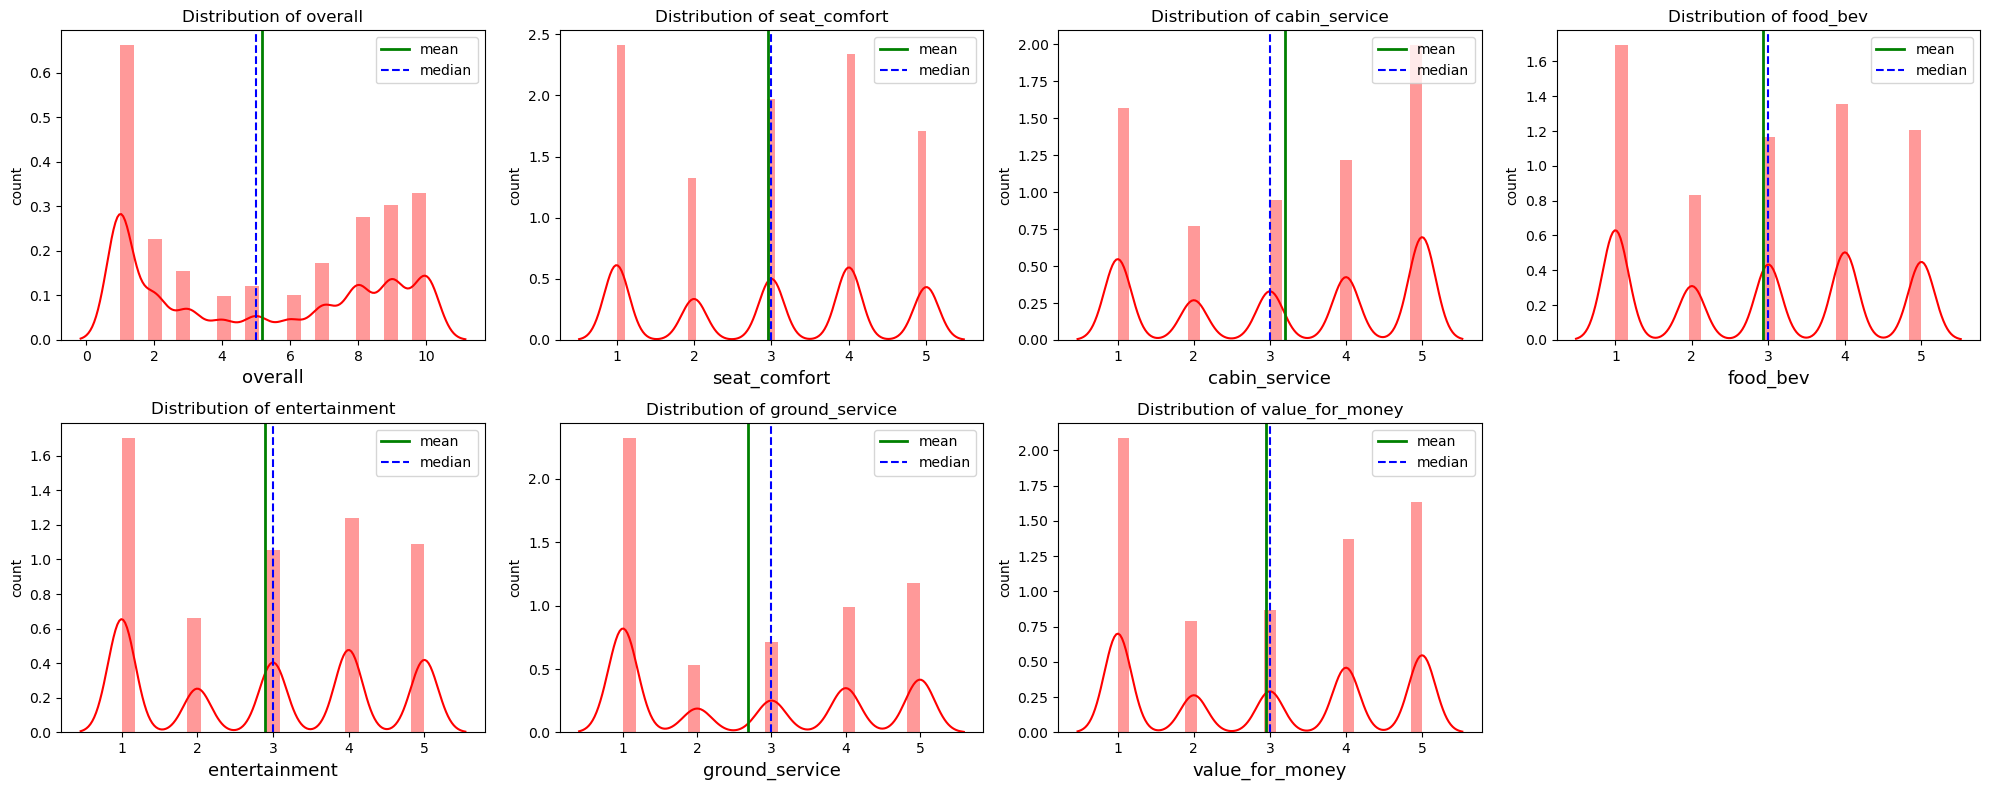

In [47]:
# List of columns to visualize
cols = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Create a figure and a set of subplots
# This creates a single row with as many columns as there are items in your 'cols' list
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8)) 

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the columns and the axes
for i, col in enumerate(cols):
    # Plot the distribution on the i-th subplot
    sns.distplot(airline_df[col], color='r', ax=axes[i])
    
    # Add title and labels
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col, fontsize=13)
    axes[i].set_ylabel('count')

    # Plot the mean and the median
    axes[i].axvline(airline_df[col].mean(), color='green', linewidth=2, label='mean')
    axes[i].axvline(airline_df[col].median(), color='blue', linestyle='dashed', linewidth=1.5, label='median')
    axes[i].legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')

#Removing extra graphs
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])
# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout()

# Display the figure with all subplots
plt.show()

*   Most of the passenger give overall rating around 4.5.
*   Most of the people give seat comfort service rating around 3.
*   Most of the people give cabin_service rating around 3.1 
*   Most of the people give food_bev service rating around 3
*   Most of the people give entertainment service rating around 2.9
*   Most of the people give ground service rating around 3
*   Most of the people give value_for_money rating around 3

**Which Traveller type has more ratings?**

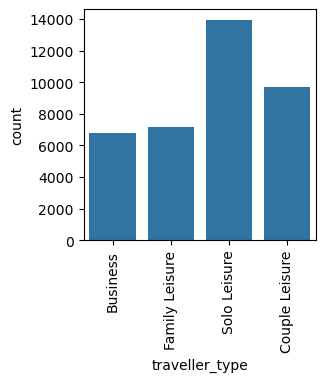

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


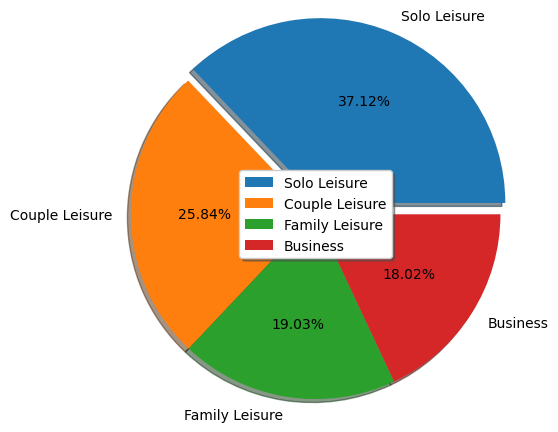

In [57]:
#set the fig size and plotting the graph
airline_df.dropna(subset=['traveller_type'],inplace=True)
plt.figure(figsize=(3,3))
sns.countplot(x=airline_df['traveller_type'],data=airline_df)
plt.xticks(rotation=90)
plt.show()

print(" ")

label_for_traveller = ['Solo Leisure','Couple Leisure','Family Leisure','Business']
data1 = airline_df['traveller_type'].value_counts().values
explode = [0.1, 0, 0, 0]
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.pie(data1, labels = label_for_traveller,explode=explode,radius=1.5,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 10})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()

As we can see above graph,Solo Lesisure has the highest value counts, we can  conclude that most people who travel by airline travel is solo.37.12% people who travel by airline is solo.Followed by couple and family.

**Which Type of Cabin has more recommendations?**

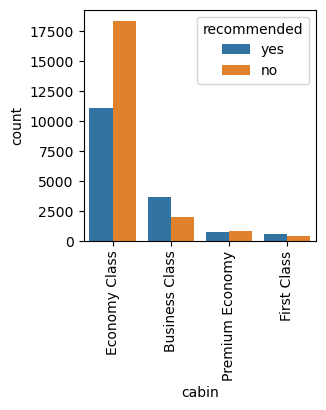

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


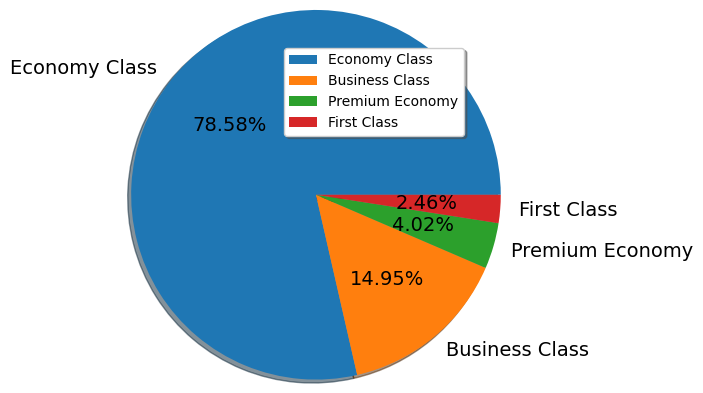

In [58]:
#setting the figure size and plotting the graph
airline_df.dropna(subset=['recommended'],inplace=True)
plt.figure(figsize=(3,3))
sns.countplot(x=airline_df['cabin'],hue=airline_df['recommended'])
plt.xticks(rotation=90)
plt.show()

print(" ")


label_for_cabin = ['Economy Class','Business Class','Premium Economy','First Class']
data2 = airline_df['cabin'].value_counts().values
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.pie(data2, labels = label_for_cabin,radius=1.5,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='upper right',shadow=True,fancybox=True)
plt.show()

•	As we can see above graph,Economy class has the highest counts with bad ratings.

•	We can conclude that most of the people around 78.58% people choose economy class to travel by airline.Followed by Business class and others

**Percentage of Cabin-Service Rating by Passengers**

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


<bound method IndexOpsMixin.value_counts of 1         5.0
3         1.0
5         4.0
7         5.0
9         1.0
         ... 
131706    2.0
131708    1.0
131710    2.0
131712    1.0
131714    5.0
Name: cabin_service, Length: 37539, dtype: float64>
[10715  9735  6100  5367  4568]


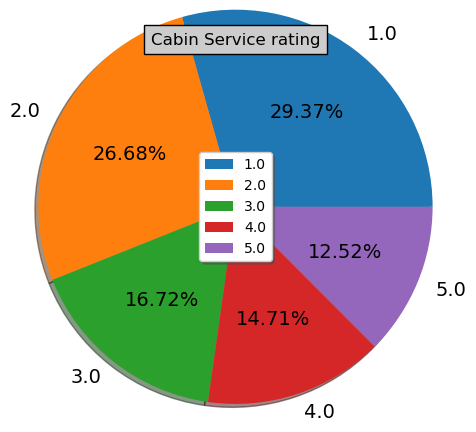

In [59]:
#setting the figure size and ploting the graph
label_for_cabin_service=['1.0','2.0','3.0','4.0','5.0']
data3=airline_df['cabin_service'].value_counts().values
print(airline_df['cabin_service'].value_counts)
print(data3)
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.title("Cabin Service rating",bbox={'facecolor':'0.8','pad':5})
plt.pie(data3,labels=label_for_cabin_service,radius=1.6,autopct='%0.2f%%',shadow=True,textprops={'fontsize':14})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()

1. 1-star ratings are the most common (≈29%), followed by 2-star ratings (≈27%).

2. High ratings (4–5 stars) together form only about 27% of total feedback.

3. The data indicates passenger dissatisfaction is higher than satisfaction, suggesting cabin service needs significant improvement.